In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name='boston')
print(housing)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


In [18]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['MEDV'])
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [19]:
df = pd.concat([data, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


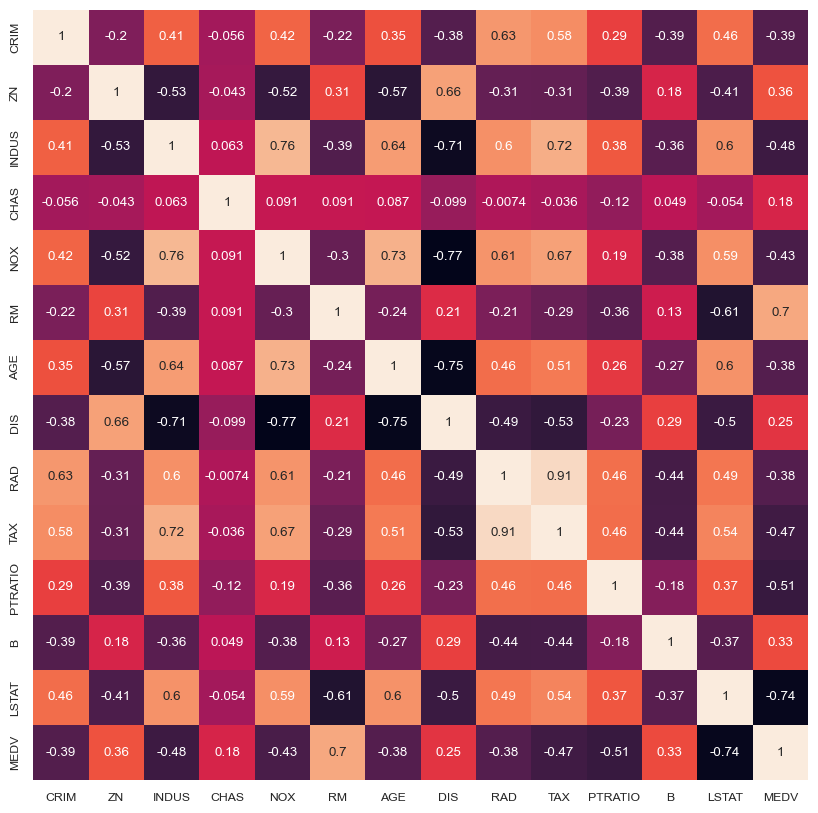

In [21]:
df_corr = df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [22]:
corr_order = df.corr().loc[:'LSTAT', 'MEDV'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [23]:
plot_cols = ['MEDV','LSTAT','RM','PTRATIO','INDUS']
plot_df = df.loc[:, plot_cols]
plot_df

,MEDV,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18
...,...,...,...,...,...
501,22.4,9.67,6.593,21.0,11.93
502,20.6,9.08,6.120,21.0,11.93
503,23.9,5.64,6.976,21.0,11.93
504,22.0,6.48,6.794,21.0,11.93


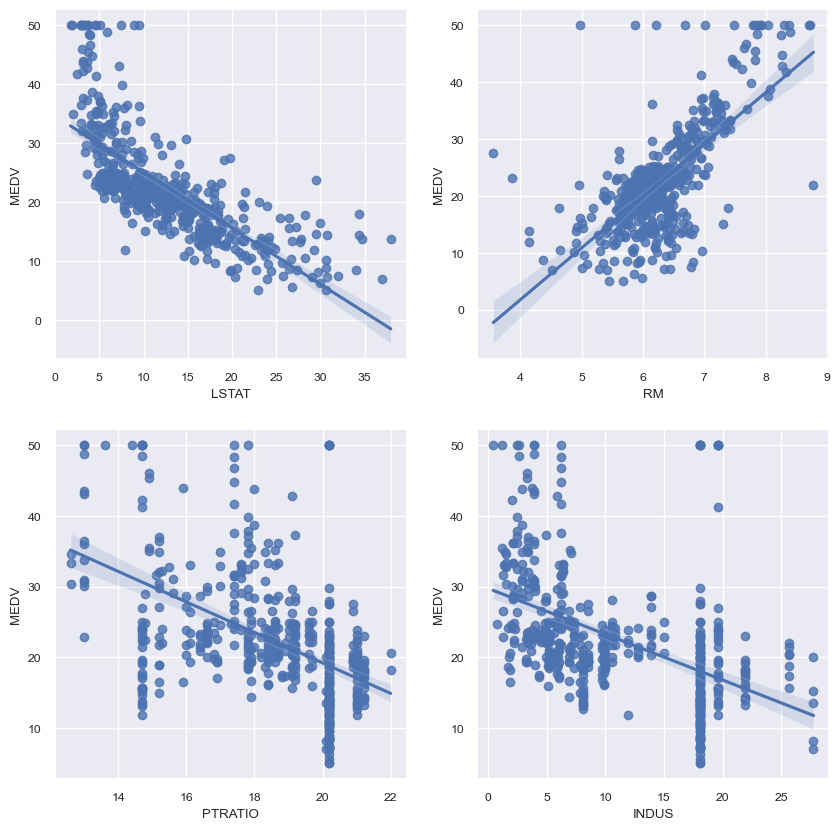

In [24]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    axl = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=axl)
plt.show()

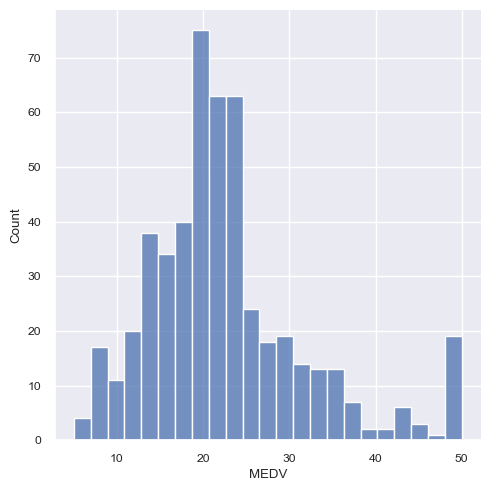

In [25]:
sns.displot(x='MEDV', kind='hist', data=df)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

df.iloc[:,:-1] = df_scaled[:, :]
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [34]:
from sklearn.model_selection import train_test_split
X_data = df.loc[:, ['LSTAT',  'RM']]
y_data = df.loc[:, 'MEDV']
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,  shuffle=True, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [36]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [-4.5  3.8]
상수항(절편): 22.5


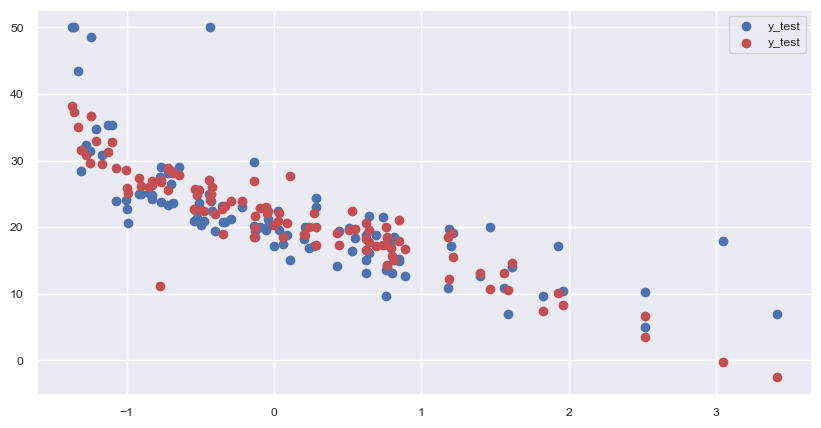

In [37]:
y_test_pred = lr.predict(x_test)

plt.figure(figsize=(10,5))
plt.scatter(x_test['LSTAT'], y_test, label='y_test')
plt.scatter(x_test['LSTAT'], y_test_pred, c='r', label='y_test')
plt.legend(loc='best')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %3f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %3f" % test_mse)

Train MSE: 30.391855
Test MSE: 31.243291


In [39]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_score, 4))
print("평균 MSE:", np.mean(mse_score))

개별 Fold의 MSE: [27.5837 40.9142 31.2975 27.3362 30.8936]
평균 MSE: 31.60504234661989


In [40]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본학습 데이터 셋:", x_train.shape)
print("2차 다항식 변환 데이터셋:", x_train_poly.shape)

원본학습 데이터 셋: (404, 2)
2차 다항식 변환 데이터셋: (404, 6)


In [42]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %3f" % train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: 3%f" % test_mse)

Train MSE: 21.056772
Test MSE: 318.433778


In [43]:
print(lr.predict(x_train_poly))

[12.47735916 22.63338425 23.84353181 12.53854818 20.05432945 28.43186286
 23.69753092 27.43689514 10.93306549 16.57374024 26.0583377  22.75634877
 31.75632588 18.11247763 35.3586091  16.24373995 19.45687877 27.32819557
 18.93065789 27.85268448 13.95839938 21.58826894 26.36416938 24.00134365
 27.51830521 33.57650346 18.08399299 41.03210609 11.03496628 25.56937138
 19.44086682 16.42074689 11.83263462 21.48469874 23.31349987 32.114934
 30.21895868 16.68892251 17.98040833 28.09084295 21.01259834 12.61301229
 11.1522788  22.10592968 17.95044225 15.3763552  14.30941819 50.32357695
 17.95093087 17.24873533 28.28553017 20.5761242  20.81327451 24.67431135
 15.46664922 25.4243157  34.6943479  12.70060367 19.57640988 18.65996338
 19.8258097  26.25430873 20.41342736 22.63598379 44.31649376 15.93939653
 17.56912865 15.14661373 18.97415181 21.46674503 22.41644547 32.2510402
 19.48724395 17.26066919 22.25196406 28.80657756 36.23755149 26.19183489
 12.76882392 12.32368895 12.19310301 16.30119805 31.93

In [44]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
x_train_poly = pf.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.3f" % train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE: 10.564
Test MSE:85195238349963568.0000


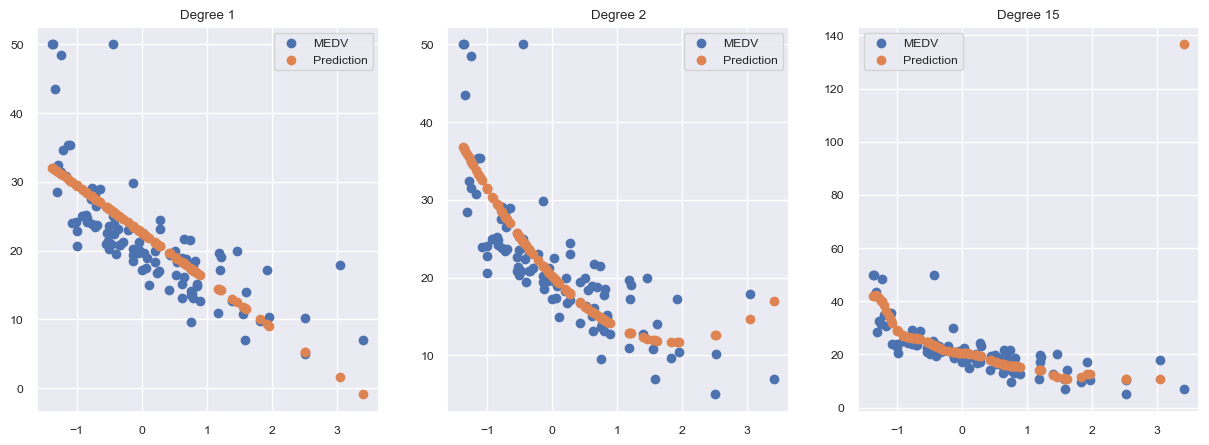

In [45]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    axl = plt.subplot(1,3, n+1)
    # plt.axis('off')
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['LSTAT']]) # 전채 행 선택후 열의 LSTAT선택 즉, RM제외
    x_test_poly = pf.fit_transform(x_test.loc[:, ['LSTAT']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)
    # 실제값 분포
    plt.scatter(x_test.loc[:,['LSTAT']], y_test, label='MEDV')
    # 예측값 분포
    plt.scatter(x_test.loc[:,['LSTAT']], y_test_pred, label='Prediction')
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()
plt.show()

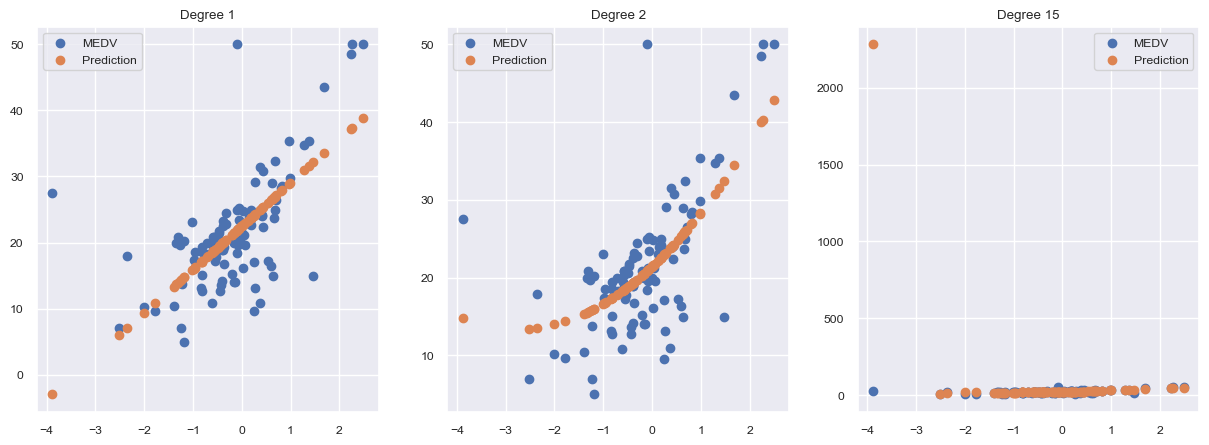

In [46]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    axl = plt.subplot(1,3, n+1)
    # plt.axis('off')
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['RM']]) # 전채 행 선택후 열의 LSTAT선택 즉, RM제외
    x_test_poly = pf.fit_transform(x_test.loc[:, ['RM']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)
    # 실제값 분포
    plt.scatter(x_test.loc[:,['RM']], y_test, label='MEDV')
    # 예측값 분포
    plt.scatter(x_test.loc[:,['RM']], y_test_pred, label='Prediction')
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()
plt.show()

In [47]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.5)
rdg.fit(x_train_poly, y_train)

y_train_pred = rdg.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE : %.4f" % train_mse)
y_test_pred = rdg.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE : 33.2883
Test MSE: 16658.4391


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.47427e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [48]:
# Lasso(L1 규제)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.05)
las.fit(x_train_poly, y_train)

y_train_pred = las.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)
y_test_pred = las.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:34.3892
Test MSE:86.6981


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.163e+03, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(


In [49]:
# ElasticNet(L2/L1 규제)
from sklearn.linear_model import ElasticNet
ela = ElasticNet(alpha=0.1, l1_ratio=0.7)
ela.fit(x_train_poly, y_train)

y_train_pred = ela.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("train MSE:%.4f" % train_mse)
y_test_pred = ela.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("test_mse:%.4f" % test_mse)

train MSE:34.4339
test_mse:156.9333


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.400e+03, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(


In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(x_train, y_train)

y_train_pred = dtr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = dtr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE : %.4f" % test_mse)

Train MSE: 17.5164
Test MSE : 24.3525


In [52]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(x_train, y_train)

y_train_pred = rfr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = rfr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:15.1118
Test MSE:19.2801


In [53]:
# XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(x_train, y_train)

y_train_pred = xgbr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = xgbr.predict(x_test)
text_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:2.9375
Test MSE:19.2801
